## Import libraries

In [119]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

## Load and inspect dataset

In [120]:
df = pd.read_csv(f"{os.getcwd()}\\titanic_train.csv")
print(df)
print(df.info())

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Clean data

In [121]:
df['Survived'].value_counts()  # 0 = died, 1 = lived  since 60% of passengers died

Survived
0    549
1    342
Name: count, dtype: int64

### Drop irrelevant features

In [122]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Check for null values

In [123]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

### Replace null values in "Age" with mean value of "Age"

In [124]:
df.fillna(value = { "Age" : df['Age'].mean()}, inplace = True)

In [125]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

### Drop all null values rows in "Embarked"

In [126]:
df.dropna(inplace=True)

In [127]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [128]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Preprocess

### One-hot encoding by dummy variables

In [129]:
Sex = pd.get_dummies(df['Sex'],drop_first = True) # dropping first column to avoid multicollinearity
Embark = pd.get_dummies(df['Embarked'],drop_first = True)

### Add dummy variables to original dataset

In [130]:
df = pd.concat([df, Sex, Embark], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


### Remove "Sex" and "Embarked" because their dummy variables are created

In [131]:
df.drop(['Sex', 'Embarked'], axis=1, inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## Extract features and labels

In [132]:
X = df.drop(['Survived'], axis = 1).values

In [133]:
y = df['Survived'].values

In [134]:
np.unique(y)

array([0, 1])

## Train test split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Standardize data

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

##  Decision Tree

### Train model

In [137]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_scaled, y_train)

### Predictions from test data

In [138]:
y_pred = dtree.predict(X_test_scaled)

### Accuracy

In [139]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 76.40


Accuracy is low, let's see the tree

### Confusion Matrics

In [140]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

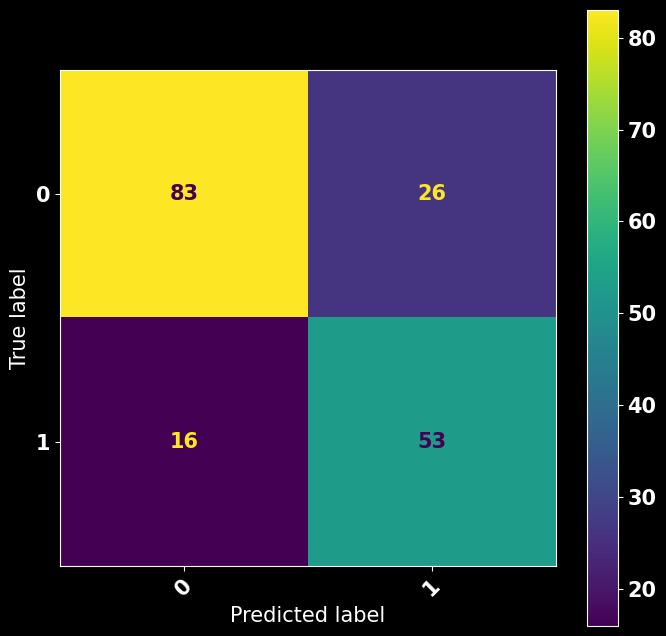

In [141]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

### Metrics

In [142]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})


In [143]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.764045,0.754635,0.764792,0.757147


In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       109
           1       0.67      0.77      0.72        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.76      0.77       178



### Visualize the tree

In [145]:
X_columns = df.drop(columns='Survived').columns
X_columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

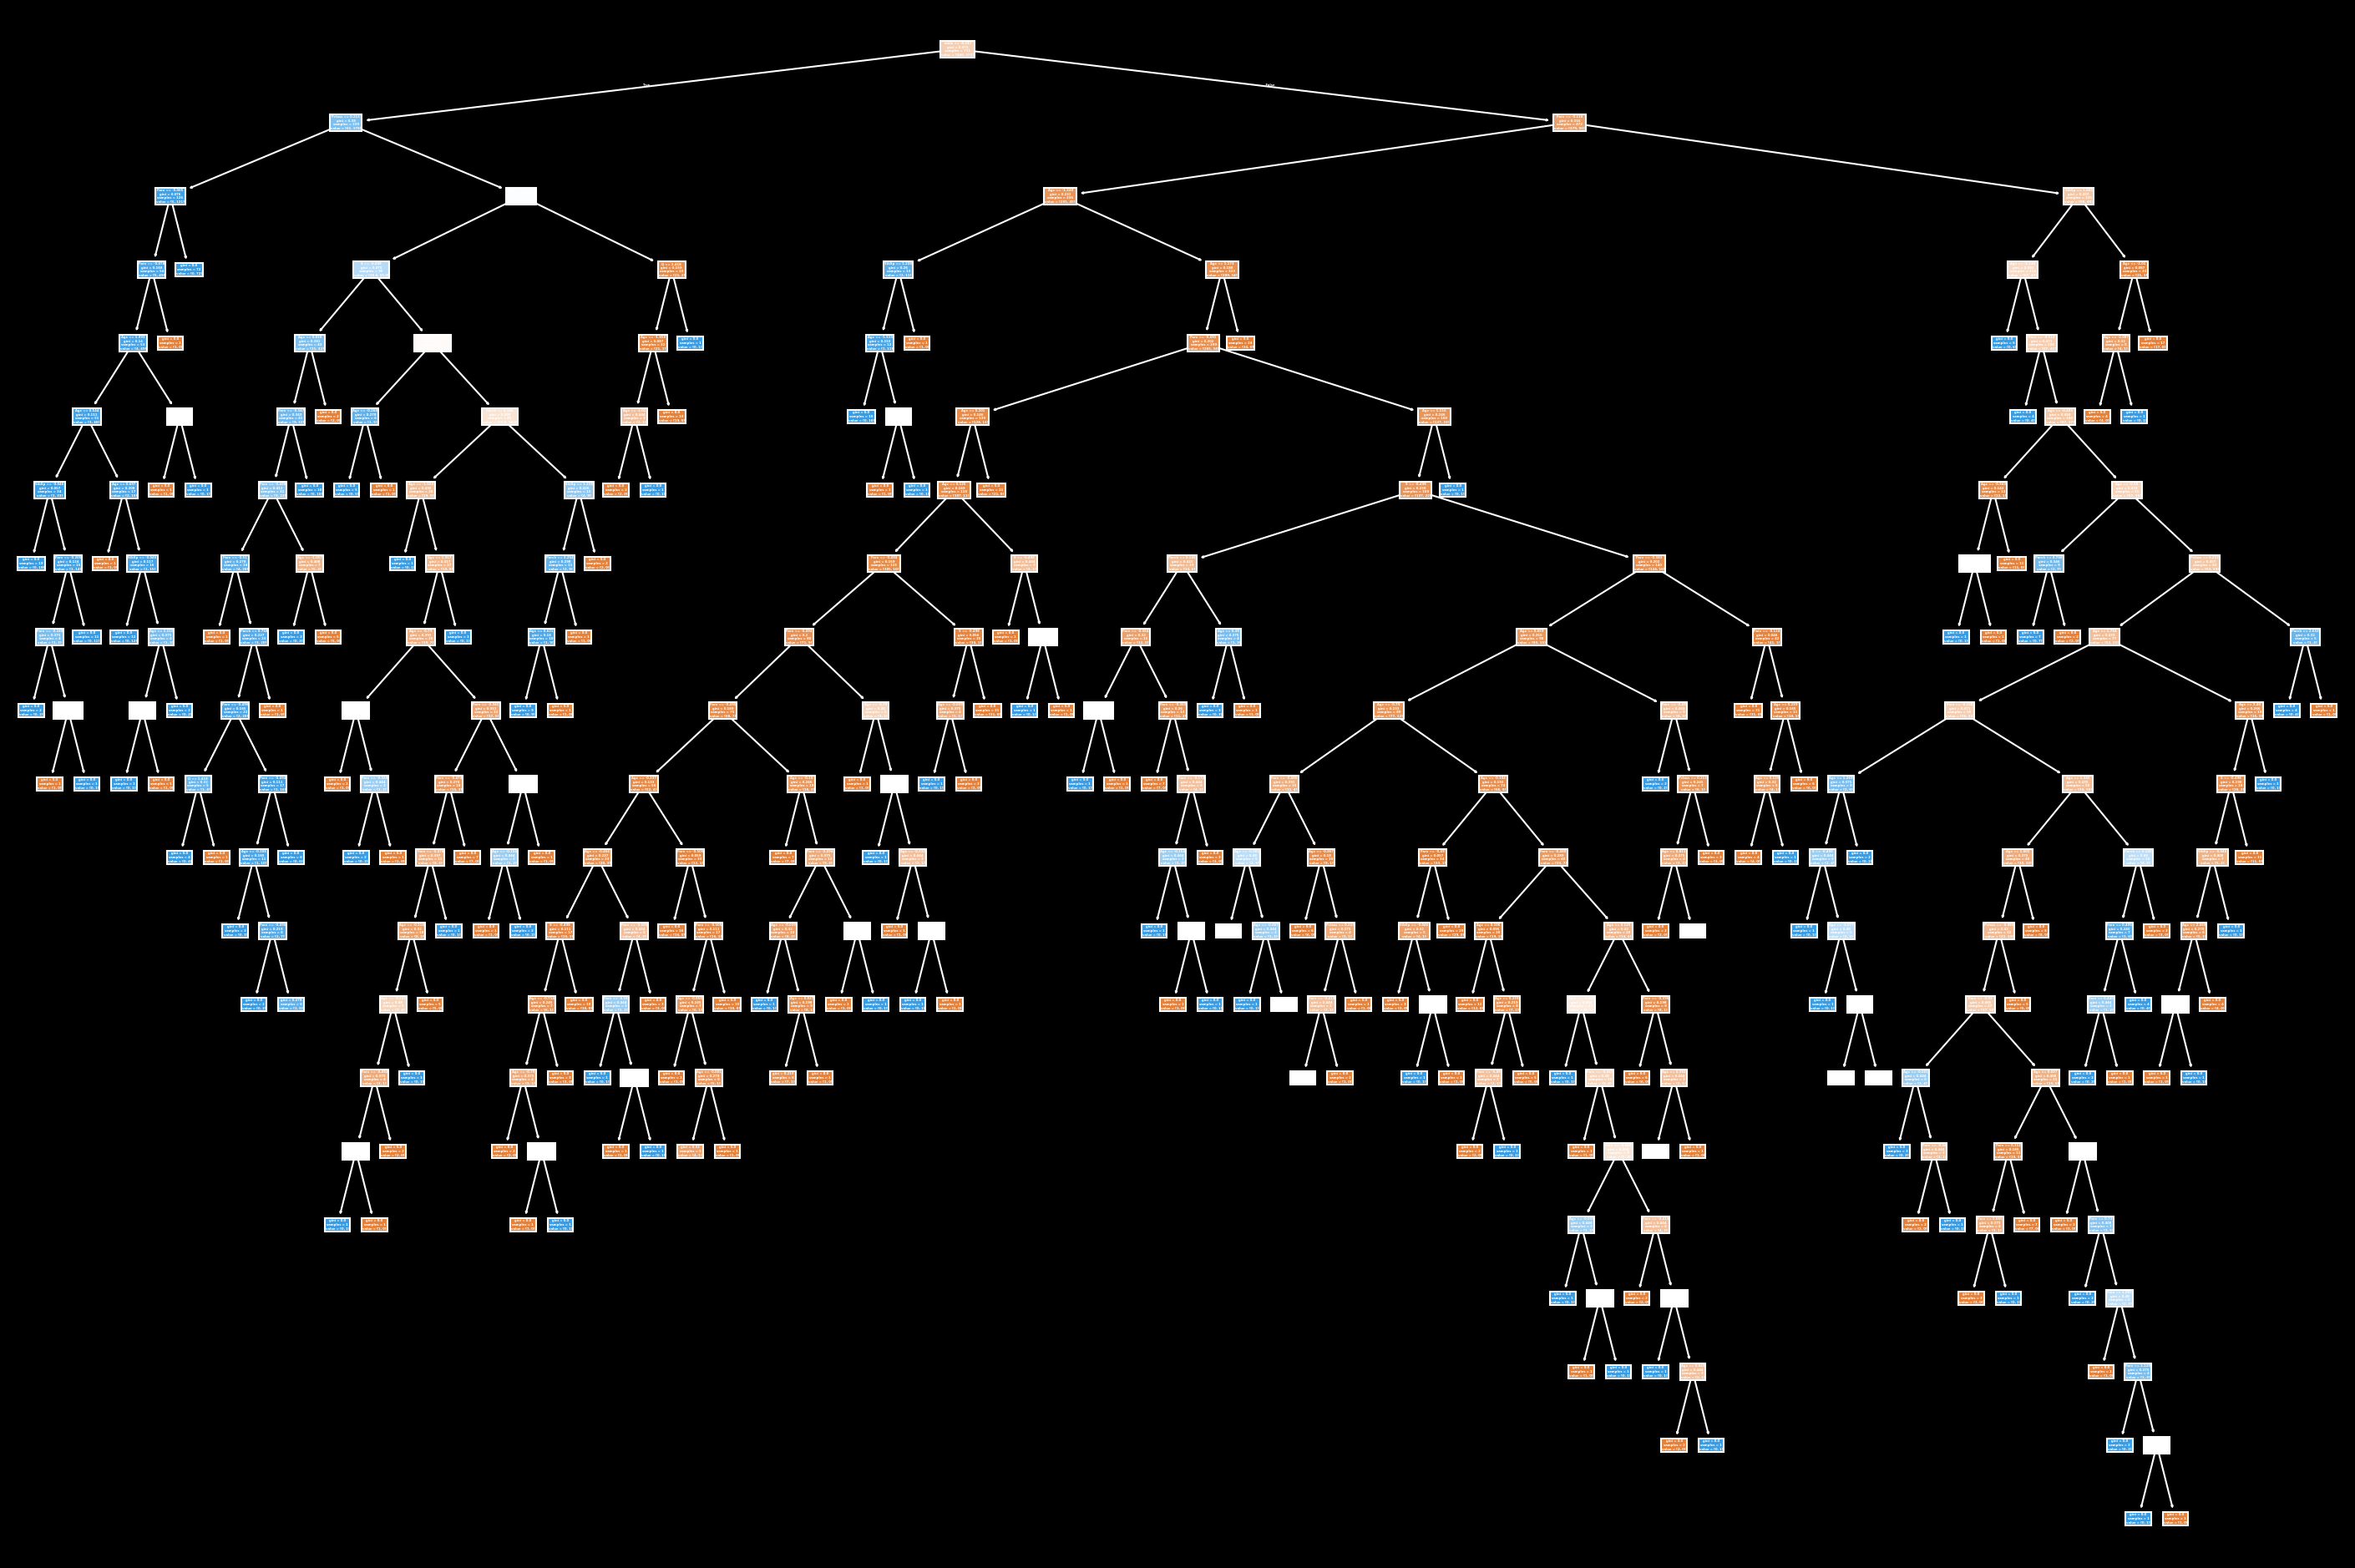

In [146]:
plt.figure(figsize=(24,16),dpi=150)
plot_tree(dtree, filled = True, feature_names = X_columns);

## Getting Important features

In [147]:
pd.DataFrame(index = X_columns, data=dtree.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Pclass,0.094073
Age,0.266201
SibSp,0.040260
Parch,0.047012
Fare,0.225524
male,0.294378
Q,0.013430
S,0.019123


## Getting Depth of Tree

In [148]:
depth = dtree.get_depth()
depth

20

## Estimating Max_Depth

In [149]:
accuracies = []

for i in range (1,depth):
  dtree = DecisionTreeClassifier(max_depth=i)
  dtree.fit(X_train_scaled, y_train)
  preds = dtree.predict(X_test_scaled)
  accuracies.append(accuracy_score(y_test, preds))

## Plotting Accuracies Vs Max_Depths

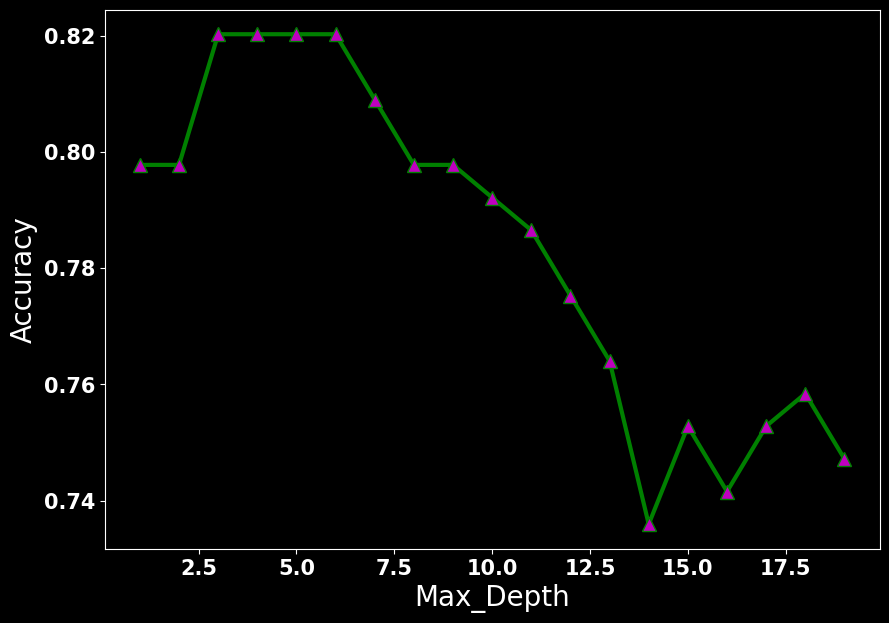

In [150]:
plt.figure(figsize = (10,7))
plt.plot(range(1,depth),accuracies, 'g', lw = 3, marker = "^", markersize = 10, markerfacecolor = 'm')
plt.xlabel('Max_Depth',fontsize = 20)
plt.ylabel('Accuracy',fontsize = 20)
plt.show()


Best max_depth is 5.

## DecisionTree with optimal max depth

### Train model

In [151]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree = dtree.fit(X_train_scaled, y_train)

### Predictions from test data

In [152]:
y_pred = dtree.predict(X_test_scaled)

### Accuracy

In [153]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 82.02


Accuracy now is much higher!

### Confusion Matrics

In [154]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

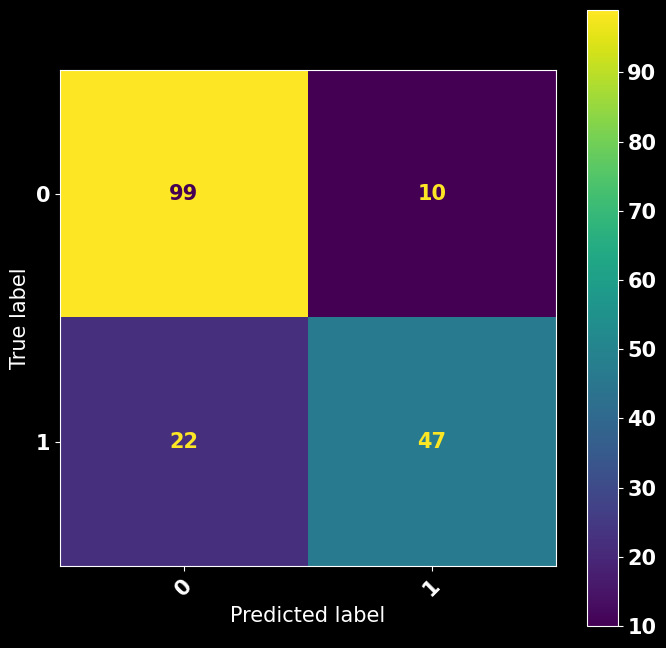

In [155]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

### Metrics

In [156]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})


In [157]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.820225,0.821372,0.794708,0.803451


In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.82      0.68      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



## Visualize the tree

In [159]:
X_columns = df.drop(columns='Survived').columns
X_columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

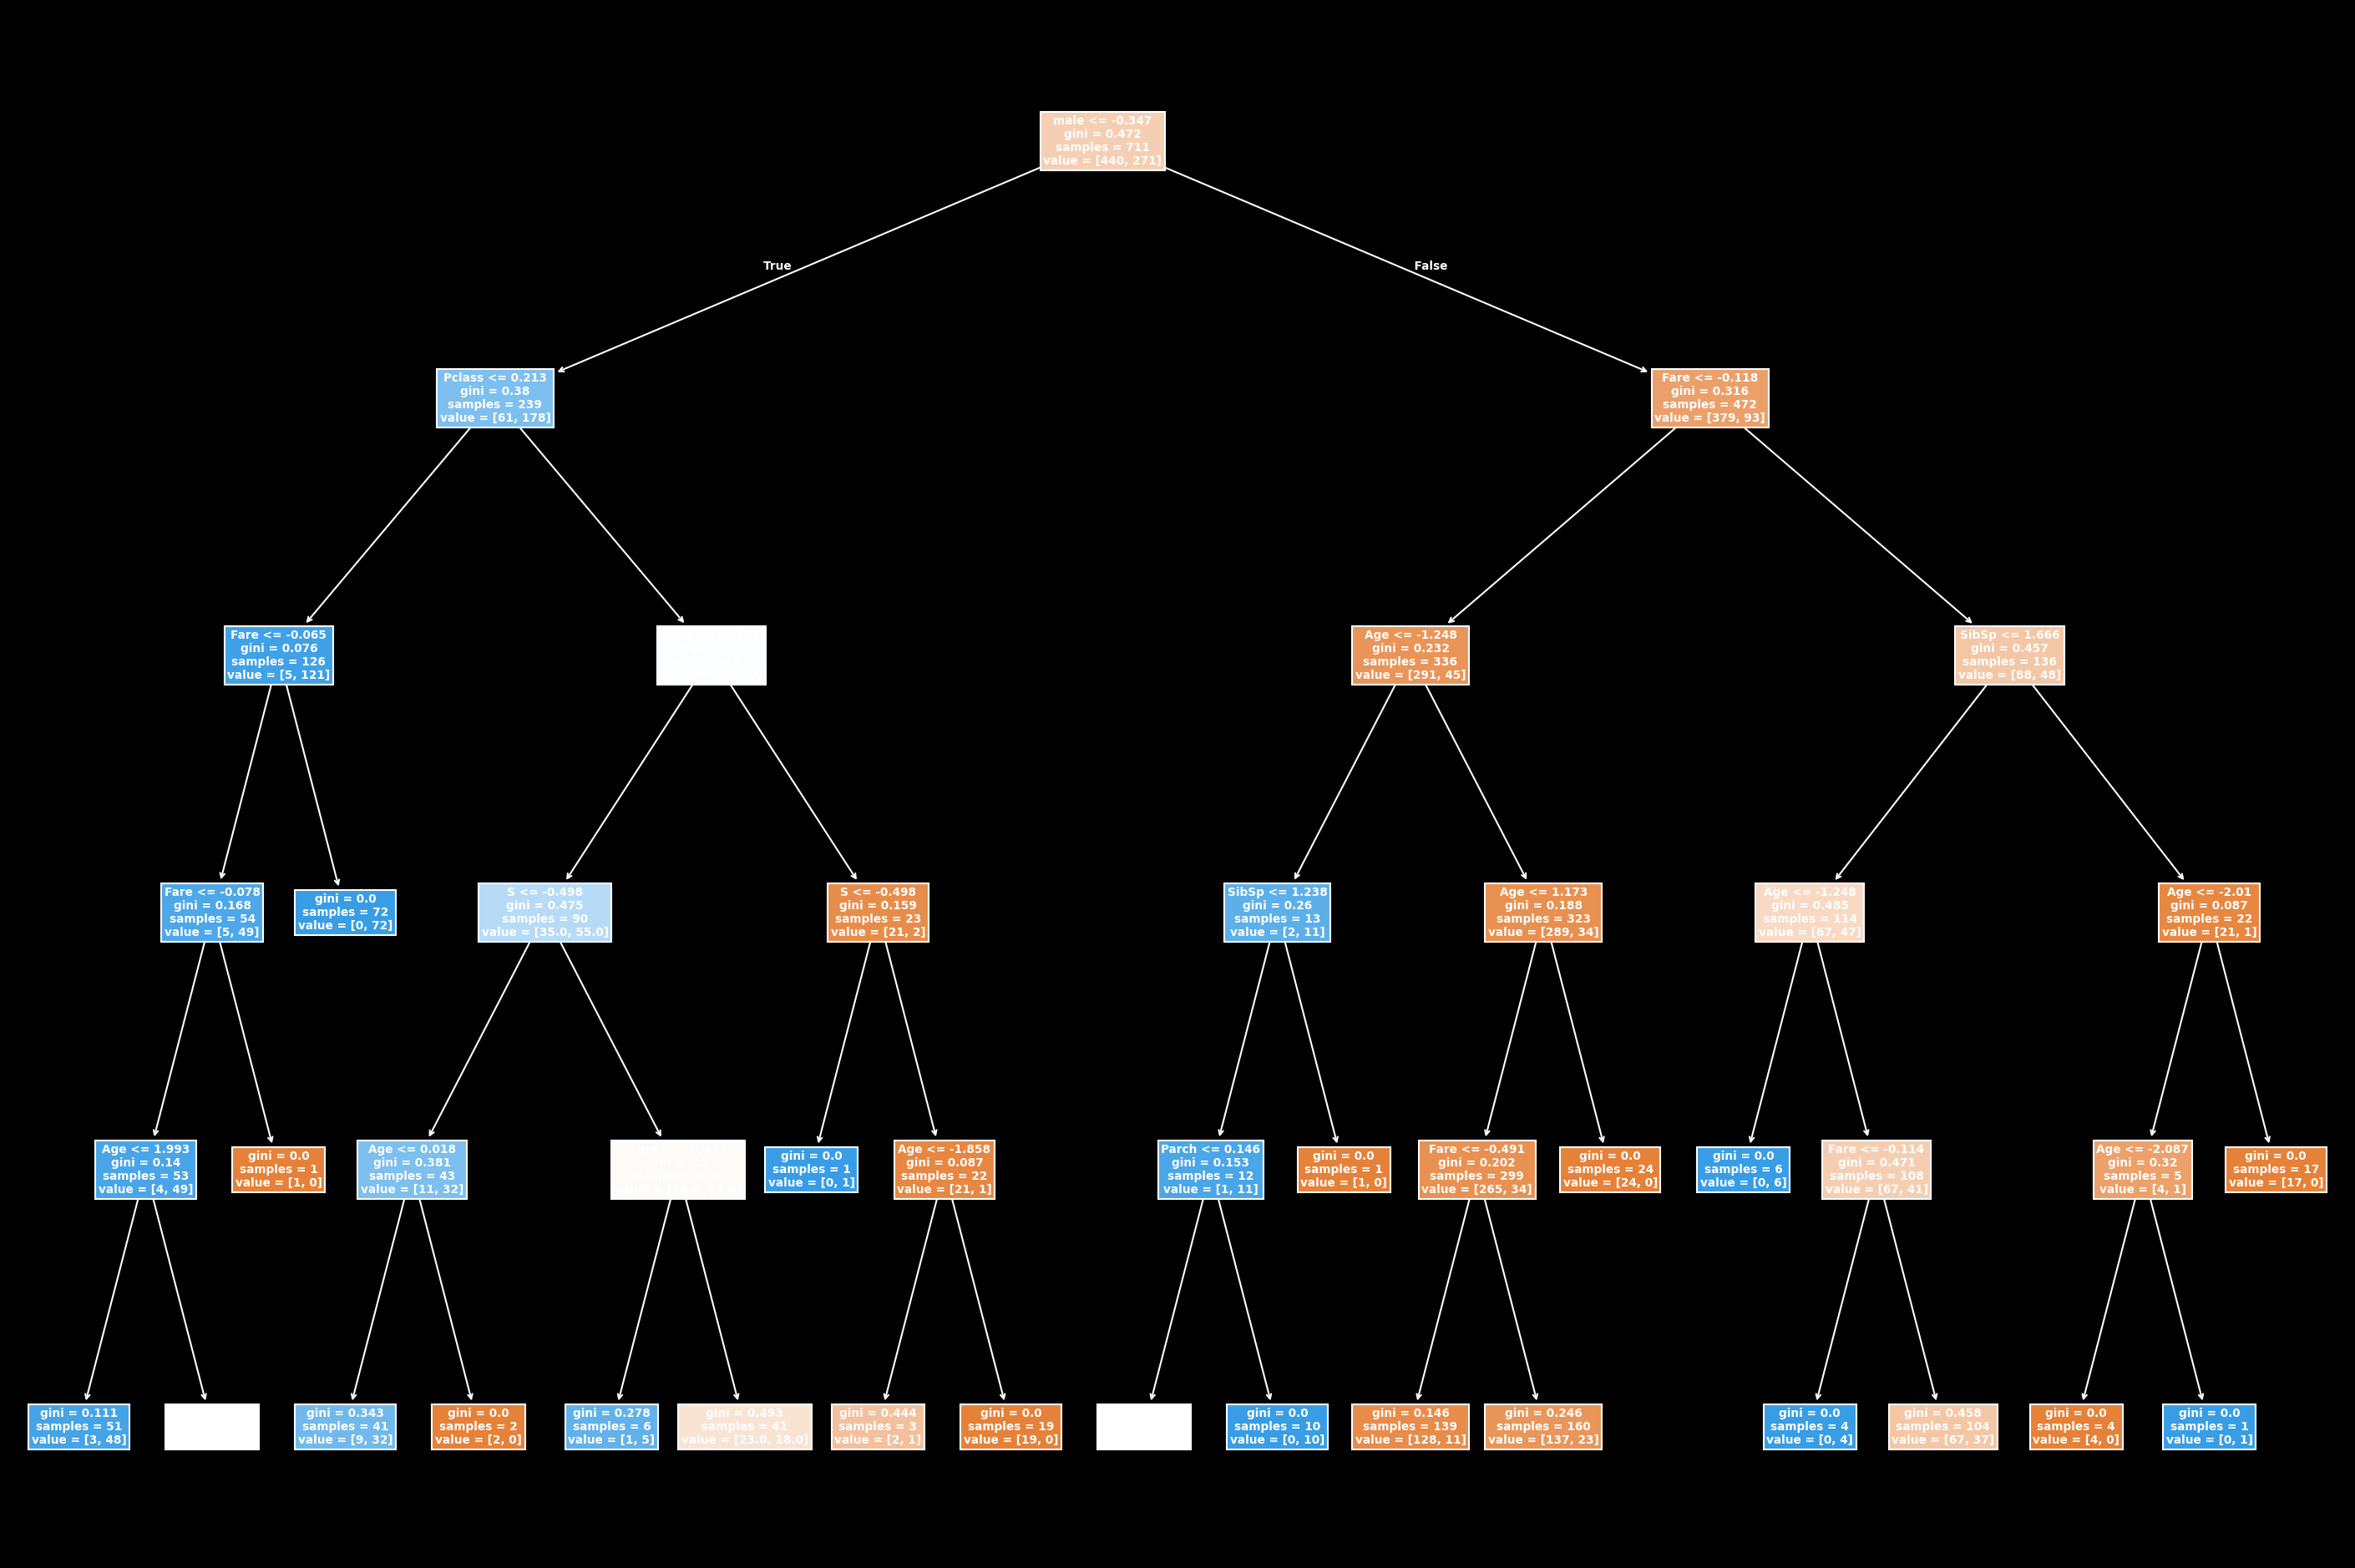

In [160]:
plt.figure(figsize=(24,16),dpi=150)
plot_tree(dtree, filled = True, feature_names = X_columns);

## Getting Important features

In [161]:
pd.DataFrame(index = X_columns, data=dtree.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Pclass,0.135167
Age,0.132239
SibSp,0.035557
Parch,0.004549
Fare,0.147410
male,0.519645
Q,0.000000
S,0.025433


## Random Forest

### Train model

In [162]:
rf = RandomForestClassifier(n_estimators=10,max_features='sqrt', bootstrap = True, oob_score = True, random_state=101)
rf.fit(X_train_scaled,y_train)

C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=10, oob_score=True, random_state=101)

### Predictions from test data

In [163]:
y_pred= rf.predict(X_test_scaled)

### Accuracy

In [164]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 76.97


### Confusion Matrics

In [165]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

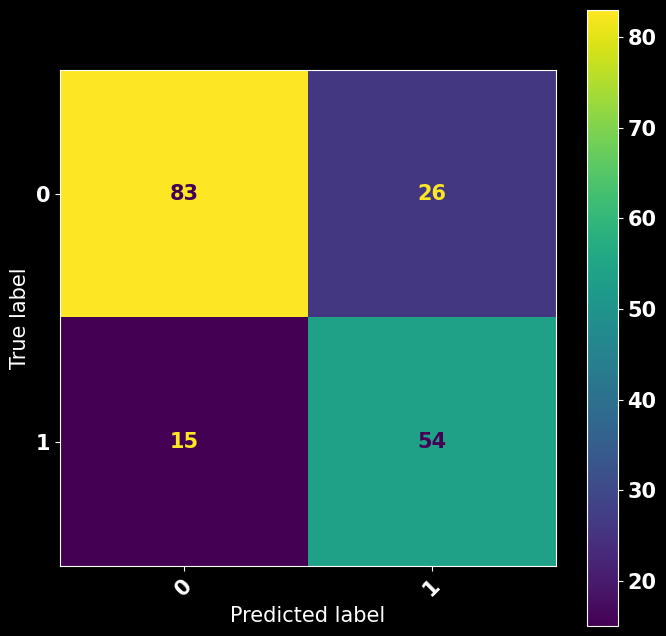

In [166]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

### Metrics

In [167]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})


In [168]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.769663,0.760969,0.772038,0.763382


In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       109
           1       0.68      0.78      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



### OOB Score and Error

In [170]:
rf.oob_score_

0.7876230661040787

In [171]:
out_of_bag_error = 1 - rf.oob_score_
out_of_bag_error

0.21237693389592127

### Optimal number of estimators

In [172]:
errors_log2 = []
errors_sqrt = []
errors_description = []
max_features = ["sqrt", "log2"]
max_depth = [1,20]

for i in range(1,160):
  for j in max_features:
    for k in max_depth:
      rfc = RandomForestClassifier(n_estimators=i, max_features=j, max_depth=k, bootstrap = True, oob_score = True, random_state=101)
      rfc.fit(X_train_scaled,y_train)
      preds = rfc.predict(X_test_scaled)
      err = 1 - accuracy_score(y_test, preds)
      if j == "sqrt":
        errors_sqrt.append(err)
      elif j == "log2":
        errors_log2.append(err)

      errors_description.append({"error": err, "max_features": j, "n_estimators": i, "max_depth": k})


C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Personal\AppData\Local\Packages\PythonSoftware

### Plot errors vs number of estimators

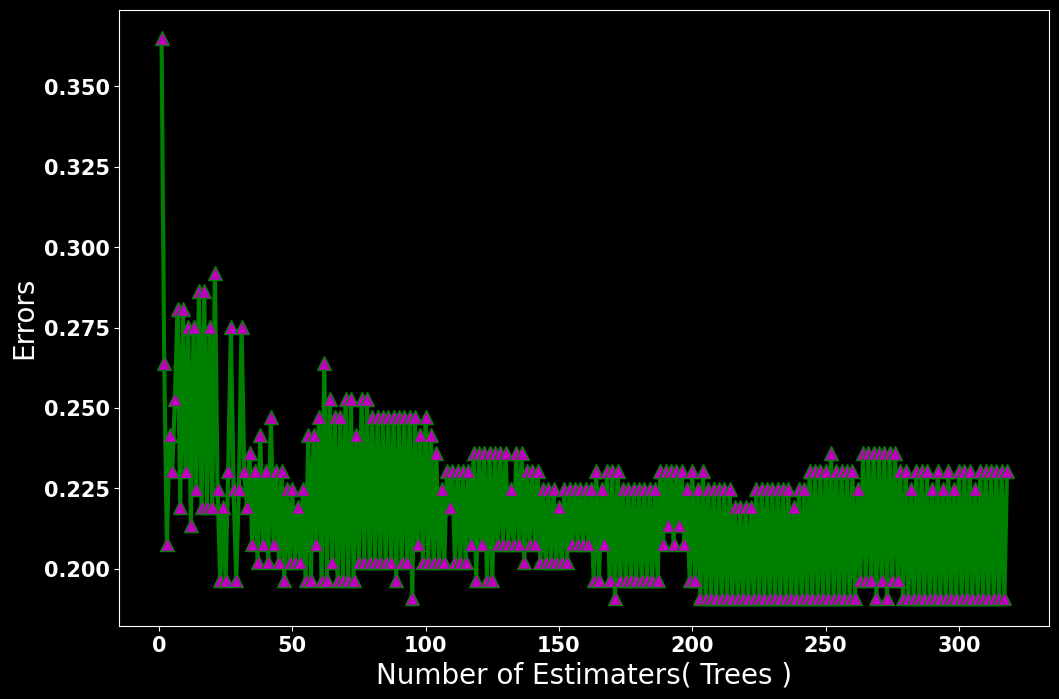

In [173]:
plt.figure(figsize = (12,8))
plt.plot(range(1,len(errors_log2)+1),errors_log2, 'g', lw = 3, marker = "^", markersize = 10, markerfacecolor = 'm')
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()


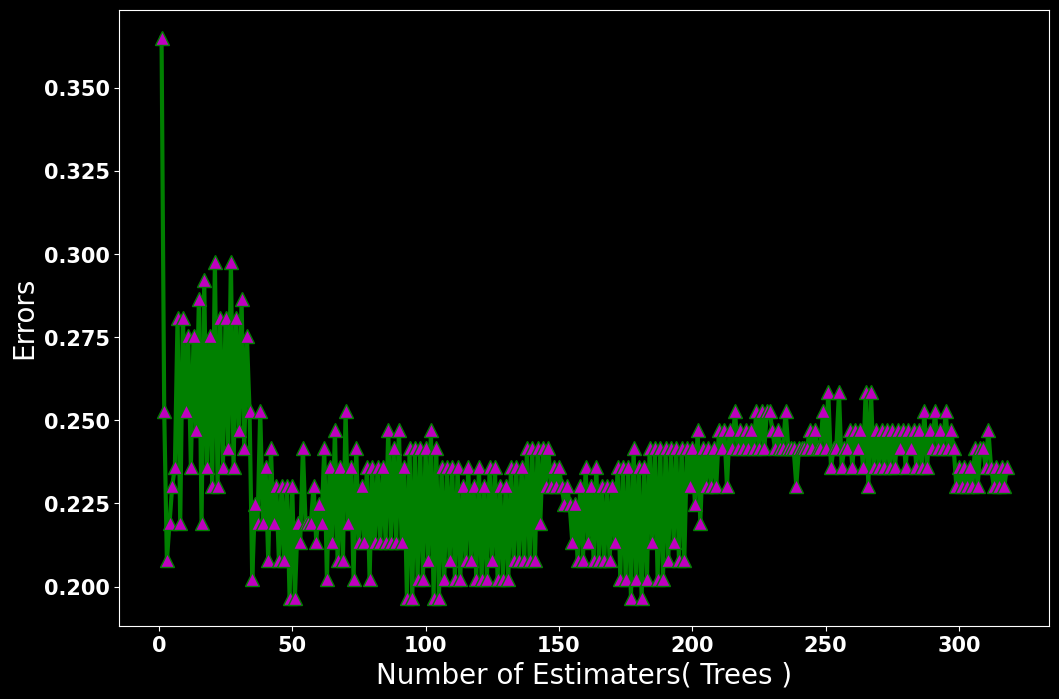

In [174]:
plt.figure(figsize = (12,8))
plt.plot(range(1,len(errors_sqrt)+1),errors_sqrt, 'g', lw = 3, marker = "^", markersize = 10, markerfacecolor = 'm')
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()


### Find max_features and number of estimators

In [175]:
min = errors_description[0]["error"]
index_min = 0
for i in range(len(errors_description)):
  if errors_description[i]["error"] < min:
    min = errors_description[i]["error"]
    index_min = i


max_features = errors_description[index_min]["max_features"]
n_estimators = errors_description[index_min]["n_estimators"]
max_depth = errors_description[index_min]["max_depth"]

### Random Forest with optimal parameters

In [176]:
rf = RandomForestClassifier(n_estimators=n_estimators,max_features=max_features, bootstrap = True, oob_score = True, max_depth=max_depth, random_state=101)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=1, max_features='log2', n_estimators=48,
                       oob_score=True, random_state=101)

In [177]:
y_pred= rf.predict(X_test_scaled)

In [178]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 80.90


### Metrics

In [179]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})


In [180]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.808989,0.808467,0.782875,0.791166


In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       109
           1       0.81      0.67      0.73        69

    accuracy                           0.81       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178

